In [ ]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)
X=2*np.random.rand(100,1)
y= 4 + 3 * X + np.random.randn(100,1)

X_b = np.c_[np.ones((100,1)),X]



In [ ]:

def batch_gradient_descent(X,y,learning_rate=0.1,n_iterations=1000):
  m=len(y)
  theta=np.random.randn(2,1)
  print(theta)
  for iteratio in range(n_iterations):
    gradients=2/m*X.T.dot(X.dot(theta)-y)
    theta=theta-learning_rate*gradients
  return theta

theta_bgd=batch_gradient_descent(X_b,y)
print(theta_bgd)

[[0.01300189]
 [1.45353408]]
[[4.21509616]
 [2.77011339]]


In [ ]:


def stochastic_gradient_descent(X,y,learning_rate=0.1,n_epochs=50):
  m=len(y)
  theta=np.random.randn(2,1)
  for epoch in range(n_epochs):
    for i in range(m):
     random_index=np.random.randint(m)
     xi=X[random_index:random_index+1]
     yi=y[random_index:random_index+1]
     gradients=2*xi.T.dot(xi.dot(theta)-yi)
     theta=theta-learning_rate*gradients
  return theta

theta_sgd = stochastic_gradient_descent(X_b, y)
print(theta_sgd)

[[4.00597696]
 [2.27516959]]


In [ ]:


def mini_batch_gradient_descent(X,y,learning_rate=0.1,n_epochs=50,batch_size=10):
  m=len(y)
  theta=np.random.randn(2,1)
  for iteration in range(n_epochs):
    shuffled_indices=np.random.permutation(m)
    X_shuffled=X[shuffled_indices]
    y_shuffled=y[shuffled_indices]
    for i in range(0,m,batch_size):
      xi=X_shuffled[i:i+batch_size]
      yi=y_shuffled[i:i+batch_size]
      gradients=2/len(xi)*xi.T.dot(xi.dot(theta)-yi)
      theta=theta-learning_rate*gradients
  return theta

theta_mbgd=mini_batch_gradient_descent(X_b,y)
print(theta_mbgd)

[[4.23881627]
 [2.8017774 ]]


In [ ]:

def momentum_optimizer(X, y, learning_rate=0.01, n_epochs=50, momentum=0.9):
    m = len(y)
    theta = np.random.randn(2, 1)
    velocity = np.zeros((2, 1))

    for epoch in range(n_epochs):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        velocity = momentum * velocity - learning_rate * gradients
        theta = theta + velocity
    return theta

theta_momentum = momentum_optimizer(X_b, y)
print(theta_momentum)

[[4.06538738]
 [3.27585726]]


In [ ]:


def adagrad_optimizer(X, y, learning_rate=0.01, n_epochs=50, epsilon=1e-8):
    m = len(y)
    theta = np.random.randn(2, 1)
    squared_gradients = np.zeros((2, 1))

    for epoch in range(n_epochs):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        squared_gradients += gradients**2
        theta = theta - learning_rate * gradients / (np.sqrt(squared_gradients) + epsilon)
    return theta

theta_adagrad = adagrad_optimizer(X_b, y)
print(theta_adagrad)

[[ 1.10853102]
 [-0.83855909]]


In [ ]:
import numpy as np

def rmsprop_optimizer(X, y, learning_rate=0.01, n_epochs=50, decay_rate=0.9, epsilon=1e-8):
    m, n = X.shape
    theta = np.random.randn(n, 1)  # n is number of features (e.g., 2 if bias is included)
    squared_gradients_avg = np.zeros((n, 1))  # Same shape as theta

    for epoch in range(n_epochs):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = (2/m) * X.T.dot(errors)

        squared_gradients_avg = decay_rate * squared_gradients_avg + (1 - decay_rate) * (gradients ** 2)
        theta -= learning_rate * gradients / (np.sqrt(squared_gradients_avg) + epsilon)

    return theta

# Example call (assuming X_b and y are defined properly)
theta_rmsprop = rmsprop_optimizer(X_b, y)
print(theta_rmsprop)


[[-0.35864385]
 [-0.93587758]
 [-1.48671884]
 [ 0.61621828]
 [ 0.28051574]
 [ 0.4911535 ]
 [ 1.12911264]
 [ 0.80924979]
 [ 0.25057907]]


In [ ]:
#Diabetes:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

import seaborn as sns
df = pd.read_csv("/content/diabetes.csv")
df = df.dropna()

df = df.select_dtypes(include='number')

X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X = np.c_[np.ones((X.shape[0], 1)), X]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

def sigmoid(z): return 1 / (1 + np.exp(-z))
def loss(y_true, y_pred): return np.mean((y_true - y_pred) ** 2)


In [ ]:


def batch_gradient_descent(X, y, learning_rate=0.1, n_iterations=1000):
    theta = np.random.randn(X.shape[1], 1)
    loss_history = []
    for i in range(n_iterations):
        gradients = 2 / len(X) * X.T.dot(sigmoid(X.dot(theta)) - y)
        theta -= learning_rate * gradients
        loss_history.append(loss(y, sigmoid(X.dot(theta))))
    return theta, loss_history

def stochastic_gradient_descent(X, y, learning_rate=0.1, n_epochs=50):
    theta = np.random.randn(X.shape[1], 1)
    m = len(y)
    loss_history = []
    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index + 1]
            yi = y[random_index:random_index + 1]
            gradients = 2 * xi.T.dot(sigmoid(xi.dot(theta)) - yi)
            theta -= learning_rate * gradients
        loss_history.append(loss(y, sigmoid(X.dot(theta))))
    return theta, loss_history

def mini_batch_gradient_descent(X, y, learning_rate=0.1, n_iterations=50, batch_size=20):
    theta = np.random.randn(X.shape[1], 1)
    m = len(y)
    loss_history = []
    for _ in range(n_iterations):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i + batch_size]
            yi = y_shuffled[i:i + batch_size]
            gradients = 2 / len(xi) * xi.T.dot(sigmoid(xi.dot(theta)) - yi)
            theta -= learning_rate * gradients
        loss_history.append(loss(y, sigmoid(X.dot(theta))))
    return theta, loss_history

def gradient_descent_with_momentum(X, y, learning_rate=0.1, gamma=0.9, num_iterations=1000):
    theta = np.random.randn(X.shape[1], 1)
    velocity = np.zeros_like(theta)
    loss_history = []
    for i in range(num_iterations):
        gradients = 2 / len(X) * X.T.dot(sigmoid(X.dot(theta)) - y)
        velocity = gamma * velocity + learning_rate * gradients
        theta -= velocity
        loss_history.append(loss(y, sigmoid(X.dot(theta))))
    return theta, loss_history

def adagrad(X, y, learning_rate=0.5, num_iterations=1000, epsilon=1e-8):
    theta = np.random.randn(X.shape[1], 1)
    gradient_accum = np.zeros_like(theta)
    loss_history = []
    for i in range(num_iterations):
        gradients = 2 / len(X) * X.T.dot(sigmoid(X.dot(theta)) - y)
        gradient_accum += gradients ** 2
        adjusted_gradients = gradients / (np.sqrt(gradient_accum) + epsilon)
        theta -= learning_rate * adjusted_gradients
        loss_history.append(loss(y, sigmoid(X.dot(theta))))
    return theta, loss_history

def rmsprop(X, y, learning_rate=0.01, beta=0.9, epsilon=1e-8, num_iterations=1000):
    theta = np.random.randn(X.shape[1], 1)
    cache = np.zeros_like(theta)
    loss_history = []
    for i in range(num_iterations):
        gradients = 2 / len(X) * X.T.dot(sigmoid(X.dot(theta)) - y)
        cache = beta * cache + (1 - beta) * gradients**2
        theta -= learning_rate * gradients / (np.sqrt(cache) + epsilon)
        loss_history.append(loss(y, sigmoid(X.dot(theta))))
    return theta, loss_history

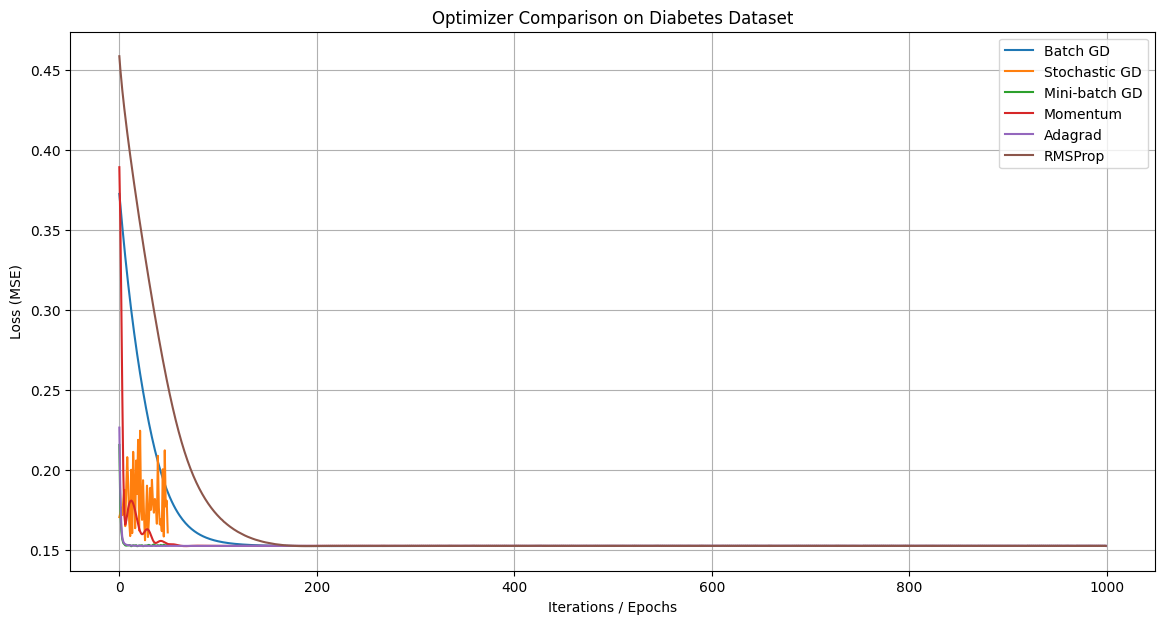

In [ ]:


theta_bgd, loss_bgd = batch_gradient_descent(X_train, y_train)
theta_sgd, loss_sgd = stochastic_gradient_descent(X_train, y_train)
theta_mbgd, loss_mbgd = mini_batch_gradient_descent(X_train, y_train)
theta_momentum, loss_momentum = gradient_descent_with_momentum(X_train, y_train)
theta_adagrad, loss_adagrad = adagrad(X_train, y_train)
theta_rmsprop, loss_rmsprop = rmsprop(X_train, y_train)

plt.figure(figsize=(14, 7))
plt.plot(loss_bgd, label="Batch GD")
plt.plot(loss_sgd, label="Stochastic GD")
plt.plot(loss_mbgd, label="Mini-batch GD")
plt.plot(loss_momentum, label="Momentum")
plt.plot(loss_adagrad, label="Adagrad")
plt.plot(loss_rmsprop, label="RMSProp")
plt.title("Optimizer Comparison on Diabetes Dataset")
plt.xlabel("Iterations / Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


SGD Accuracy: 0.8667
Momentum Accuracy: 1.0000
Adam Accuracy: 0.9111
RMSprop Accuracy: 0.8444
Adagrad Accuracy: 0.6222


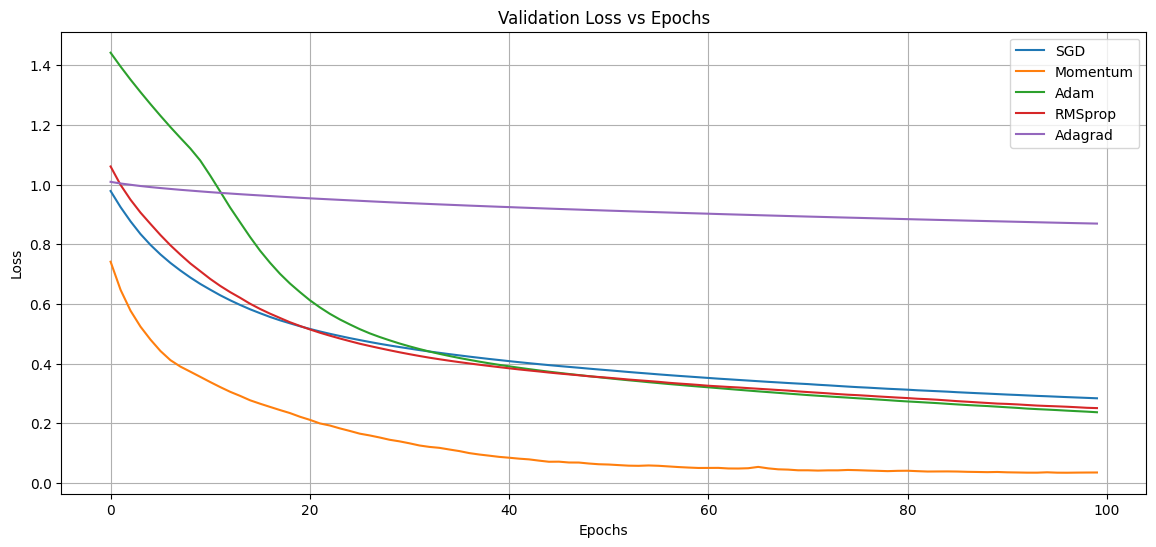

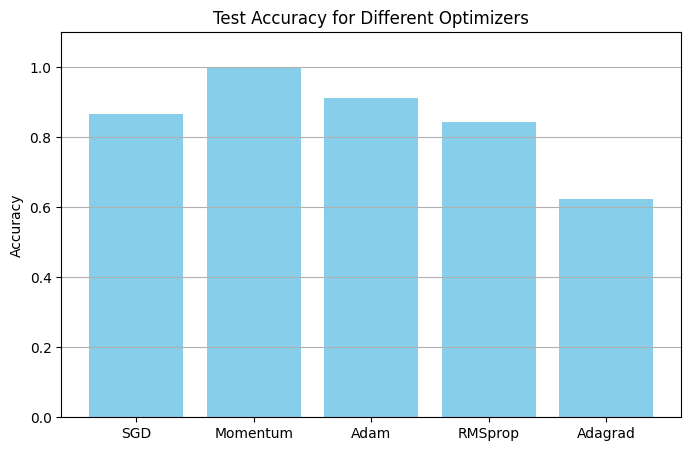

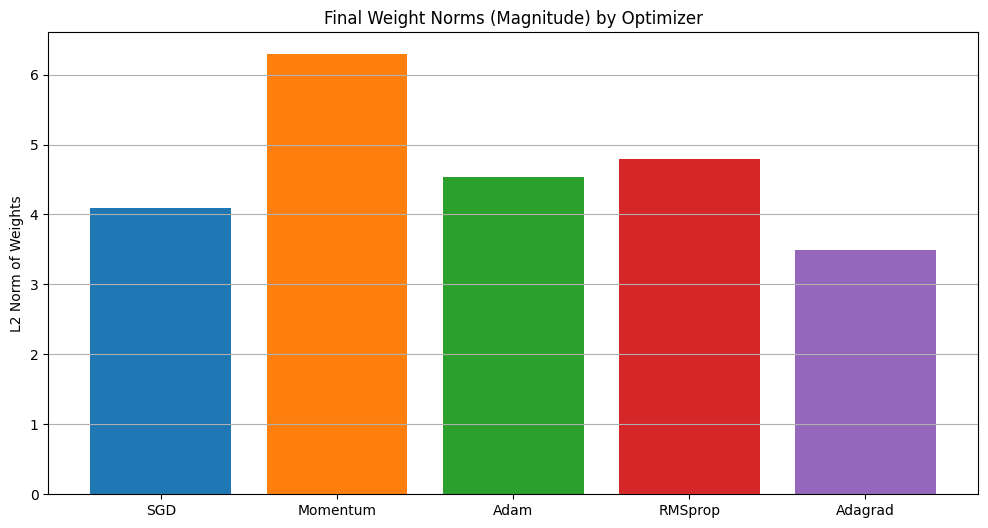

In [ ]:
#Iris:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 1. Load and preprocess Iris dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Define model builder function
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    return model

# 3. Training and evaluation function
def train_evaluate(optimizer, name):
    model = build_model()
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=100, batch_size=16,
                        validation_data=(X_test, y_test), verbose=0)

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    weights = model.get_weights()

    print(f"{name} Accuracy: {test_acc:.4f}")
    return name, history, weights, test_acc

# 4. Run for multiple optimizers
optimizers = {
    "SGD": tf.keras.optimizers.SGD(),
    "Momentum": tf.keras.optimizers.SGD(momentum=0.9),
    "Adam": tf.keras.optimizers.Adam(),
    "RMSprop": tf.keras.optimizers.RMSprop(),
    "Adagrad": tf.keras.optimizers.Adagrad()
}

histories = []
weights_history = []
accuracies = []

for name, opt in optimizers.items():
    name, hist, weights, acc = train_evaluate(opt, name)
    histories.append((name, hist))
    weights_history.append((name, weights))
    accuracies.append((name, acc))

# 5. Plot Learning Curves
plt.figure(figsize=(14, 6))
for name, history in histories:
    plt.plot(history.history['val_loss'], label=f'{name}')
plt.title('Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 6. Plot Accuracy Bar Chart
names = [name for name, acc in accuracies]
accs = [acc for name, acc in accuracies]
plt.figure(figsize=(8, 5))
plt.bar(names, accs, color='skyblue')
plt.title("Test Accuracy for Different Optimizers")
plt.ylabel("Accuracy")
plt.ylim(0, 1.1)
plt.grid(True, axis='y')
plt.show()

# 7. Visualize magnitude of final weight changes (parameter norms)
plt.figure(figsize=(12, 6))
for name, weights in weights_history:
    flat_weights = np.concatenate([w.flatten() for w in weights])
    norm = np.linalg.norm(flat_weights)
    plt.bar(name, norm)
plt.title("Final Weight Norms (Magnitude) by Optimizer")
plt.ylabel("L2 Norm of Weights")
plt.grid(True, axis='y')
plt.show()


In [ ]:
#building complex models using functional api

import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras


housing = fetch_california_housing()
X, y = housing.data, housing.target


X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test  = scaler.transform(X_test)


X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A,  X_test_B  = X_test[:, :5],  X_test[:, 2:]


input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

#input_A: Goes directly into the final output (wide input).

#input_B: Goes through hidden layers (deep input).

hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.concatenate([input_A, hidden2])

output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

#Combine outputs from wide and deep paths.

model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

# 6. Compile Model
model.compile(loss=["mse", "mse"],
              loss_weights=[0.9, 0.1],
              optimizer="sgd")

# 7. Train Model
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train],
    epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid])
)


total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
print("Total loss:", total_loss)
print("Main output loss:", main_loss)
print("Aux output loss:", aux_loss)

X_new_A, X_new_B = X_test[:3, :5], X_test[:3, 2:]
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
print("Predictions (main):", y_pred_main)
print("Predictions (aux):", y_pred_aux)


Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - aux_output_loss: 3.3274 - loss: 1.5788 - main_output_loss: 1.3845 - val_aux_output_loss: 1.3286 - val_loss: 0.7621 - val_main_output_loss: 0.6973
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - aux_output_loss: 1.1792 - loss: 0.5835 - main_output_loss: 0.5173 - val_aux_output_loss: 1.0771 - val_loss: 0.5400 - val_main_output_loss: 0.4794
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 0.9717 - loss: 0.5087 - main_output_loss: 0.4572 - val_aux_output_loss: 0.9368 - val_loss: 0.5353 - val_main_output_loss: 0.4898
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 0.8460 - loss: 0.4954 - main_output_loss: 0.4565 - val_aux_output_loss: 0.8272 - val_loss: 0.5116 - val_main_output_loss: 0.4753
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 0.7464 - loss: 0.4596 - main_output_loss: 0.4277 - val_aux_output_loss: 0.7918 - val_loss: 0.4733 - val_main_output_loss: 0.4371


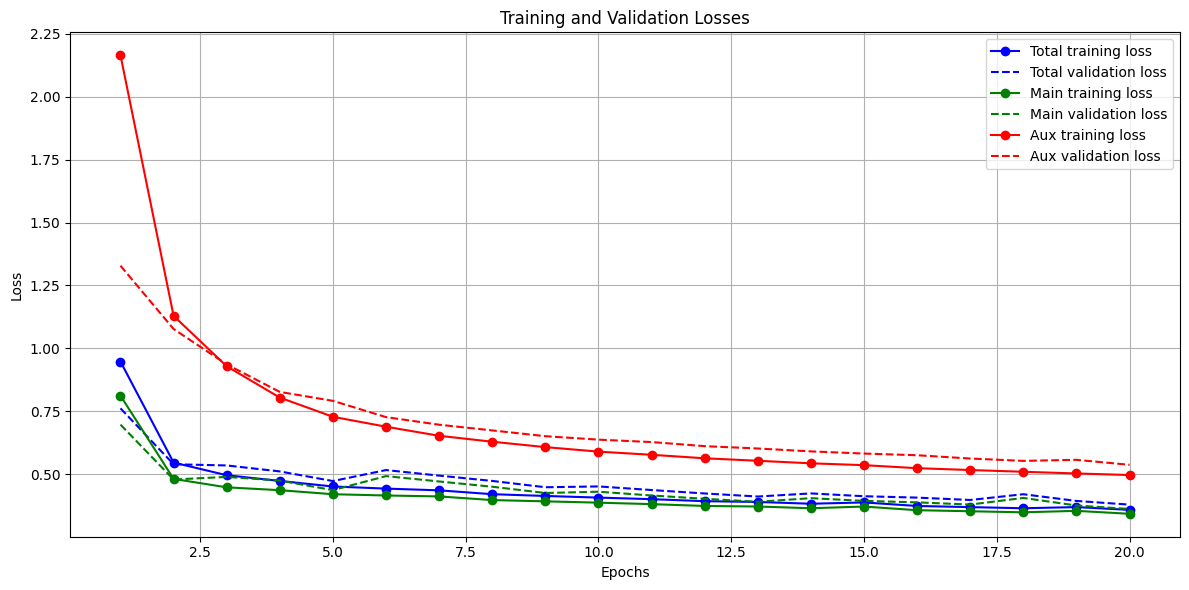

In [ ]:
import matplotlib.pyplot as plt

# Plotting training and validation loss curves
def plot_history(history):
    history_dict = history.history
    loss = history_dict["loss"]
    val_loss = history_dict["val_loss"]
    main_loss = history_dict["main_output_loss"]
    val_main_loss = history_dict["val_main_output_loss"]
    aux_loss = history_dict["aux_output_loss"]
    val_aux_loss = history_dict["val_aux_output_loss"]

    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(12, 6))
    plt.plot(epochs, loss, "bo-", label="Total training loss")
    plt.plot(epochs, val_loss, "b--", label="Total validation loss")

    plt.plot(epochs, main_loss, "go-", label="Main training loss")
    plt.plot(epochs, val_main_loss, "g--", label="Main validation loss")

    plt.plot(epochs, aux_loss, "ro-", label="Aux training loss")
    plt.plot(epochs, val_aux_loss, "r--", label="Aux validation loss")

    plt.title("Training and Validation Losses")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function
plot_history(history)


In [ ]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
print(f"Main Output MSE: {main_loss:.4f}")
print(f"Auxiliary Output MSE: {aux_loss:.4f}")
print(f"Weighted Total Loss: {total_loss:.4f}")


129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 0.4825 - loss: 0.3654 - main_output_loss: 0.3523
Main Output MSE: 0.3509
Auxiliary Output MSE: 0.4876
Weighted Total Loss: 0.3646


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on test data
y_pred_main, y_pred_aux = model.predict([X_test_A, X_test_B])

# Main Output Metrics
mse_main = mean_squared_error(y_test, y_pred_main)
mae_main = mean_absolute_error(y_test, y_pred_main)
r2_main  = r2_score(y_test, y_pred_main)

print(f"Main Output Metrics:")
print(f"  MSE : {mse_main:.4f}")
print(f"  MAE : {mae_main:.4f}")
print(f"  R²  : {r2_main:.4f}")

# Aux Output Metrics (optional)
mse_aux = mean_squared_error(y_test, y_pred_aux)
print(f"\nAux Output MSE : {mse_aux:.4f}")


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Main Output Metrics:
  MSE : 0.3509
  MAE : 0.4165
  R²  : 0.7322

Aux Output MSE : 0.4876


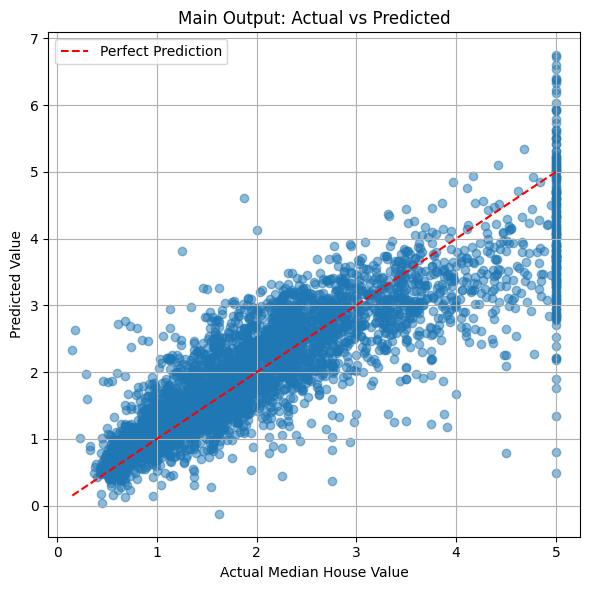

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_main, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--", label="Perfect Prediction")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Value")
plt.title("Main Output: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


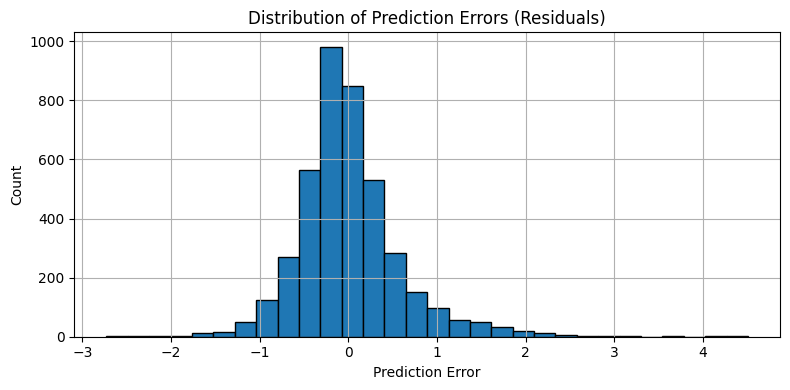

In [ ]:
residuals = y_test - y_pred_main.ravel()

plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#above is multiple inputs

In [ ]:
#with a single input and single output

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score




In [ ]:
housing = fetch_california_housing()
print(housing.data[:5])

[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]


In [ ]:
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Input layer
input_layer = Input(shape=(X_train.shape[1],))

In [ ]:
# Wide part (raw input for linear path)
wide = input_layer

In [ ]:
# Deep part (non-linear transformation)
deep = Dense(128, activation='relu')(input_layer)
deep = Dropout(0.3)(deep)
deep = Dense(64, activation='relu')(deep)
deep = Dropout(0.3)(deep)
deep = Dense(32, activation='relu')(deep)

In [ ]:
# Concatenate wide and deep paths
combined = Concatenate()([wide, deep])

In [ ]:
# Output layer for regression (no activation)
output = Dense(1)(combined)

In [ ]:
# Build model
model = Model(inputs=input_layer, outputs=output)

In [ ]:
# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae'])  # Mean Absolute Error for evaluation

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=0)

In [ ]:
# Evaluate
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)

# Predict
y_pred = model.predict(X_test_scaled).flatten()

# Compute RMSE and R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Test MSE:  {loss:.4f}")
print(f"Test MAE:  {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²:   {r2:.4f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test MSE:  0.2706
Test MAE:  0.3527
Test RMSE: 0.5202
Test R²:   0.7935


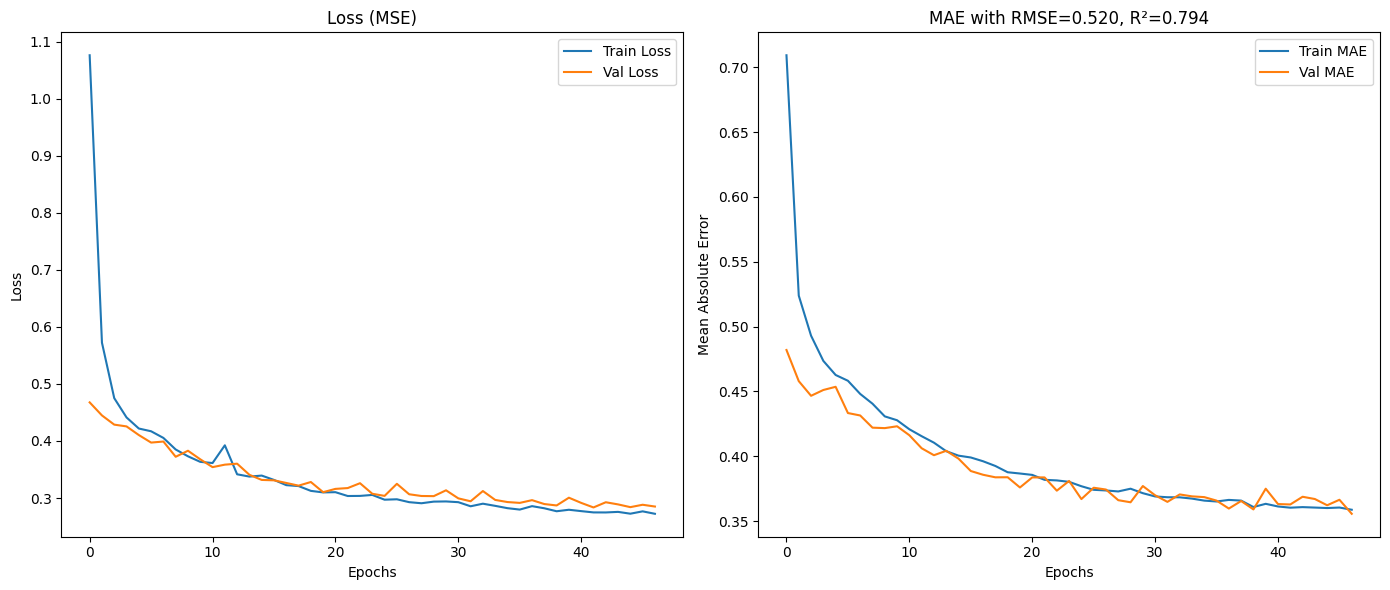

In [ ]:
# Plot history
plt.figure(figsize=(14, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title(f'MAE with RMSE={rmse:.3f}, R²={r2:.3f}')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()
